### Pandas continued

See chapter 5 of Wes McKinney Python for Data Analysis

https://wesmckinney.com/book/pandas-basics.html#pandas_construction


### DataFrame

A DataFrame is like an excel spreadsheet, i.e. 2D object

- column names are in a list called `columns`
- rows or names of rows are in a list called `index` (not rows)
- if you construct a DataFrame from a dictionary, the **keys** of the dictionary become **column** names, not row names 


In [164]:
import pandas as pd
import numpy as np

matrix=np.arange(12).reshape(3,4)
print(matrix)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [165]:
df=pd.DataFrame(matrix, columns=['A', 'B', 'C', 'D'], index=[2, 'row2', 'row3'])

In [166]:
df

,A,B,C,D
2,0,1,2,3
row2,4,5,6,7
row3,8,9,10,11


In [167]:
df['A']

2       0
row2    4
row3    8
Name: A, dtype: int64

In [169]:
df['row1'] #gives error, must use loc and iloc for rows!

KeyError: 'row1'

In [ ]:
df

,A,B,C,D
2,0,1,2,3
row2,4,5,6,7
row3,8,9,10,11


In [ ]:
df.index

Index([2, 'row2', 'row3'], dtype='object')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [ ]:
df.loc[2]

A    0
B    1
C    2
D    3
Name: 2, dtype: int64

In [ ]:
df.iloc[0]  #iloc is `integer locate', python counting starts at 0

A    0
B    1
C    2
D    3
Name: 2, dtype: int64

### Deleting a row or column:

use `.drop(column=[])` for dropping columns 

or `.drop(index=[])` for dropping rows (index means rows)

In [ ]:
df

,A,B,C,D
2,0,1,2,3
row2,4,5,6,7
row3,8,9,10,11


In [ ]:
df.drop(columns=['A'])

,B,C,D
2,1,2,3
row2,5,6,7
row3,9,10,11


In [ ]:
df

,A,B,C,D
2,0,1,2,3
row2,4,5,6,7
row3,8,9,10,11


Notice above that column A has not been deleted from `df` because the `drop` operation first creates a **copy** of `df`, from which it deletes the column, and it does not act on `df`. But you want it to delete the column in your original DataFrame, use `inplace=True` as below:

In [ ]:
df.drop(columns=['A'], inplace=True)

In [ ]:
df

,B,C,D
2,1,2,3
row2,5,6,7
row3,9,10,11


In [ ]:
# delete row2
df.drop(index=['row2'])

,B,C,D
2,1,2,3
row3,9,10,11


### Replacing a column

In [ ]:
df

,B,C,D
2,1,2,3
row2,5,6,7
row3,9,10,11


In [ ]:
df['B']=[2,3, 4]

In [ ]:
df

,B,C,D
2,2,2,3
row2,3,6,7
row3,4,10,11


###  Replacing a row

In [ ]:
df.loc['row2']=[20,20,20]

In [ ]:
df

,B,C,D
2,2,2,3
row2,20,20,20
row3,4,10,11


# Filtering based on value of a column

Suppose we want all rows where value in column C is >5.

First create a true-false 'mask':

In [ ]:
df

,B,C,D
2,2,2,3
row2,20,20,20
row3,4,10,11


In [ ]:
df['C']>5

2       False
row2     True
row3     True
Name: C, dtype: bool

In [ ]:
df[df['C']>5]

,B,C,D
row2,20,20,20
row3,4,10,11


In [ ]:
mask=df['C']>5
df[mask]

,B,C,D
row2,20,20,20
row3,4,10,11


In [ ]:
df

,B,C,D
2,2,2,3
row2,20,20,20
row3,4,10,11


In [ ]:
mask2=df['B']<=4

In [ ]:
mask2

2        True
row2    False
row3     True
Name: B, dtype: bool

In [ ]:
df[mask2]

,B,C,D
2,2,2,3
row3,4,10,11


Adding two dataframes with possibly some different columns or indexes is possible, will just introduce `NaN`s in appropriate places. This example is copied from McKinney section 5.2:

In [ ]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list("bcd"),
   .....:                    index=["Ohio", "Texas", "Colorado"])

df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list("bde"),
   .....:                    index=["Utah", "Ohio", "Texas", "Oregon"])


In [ ]:
df1, df2

(            b    c    d
 Ohio      0.0  1.0  2.0
 Texas     3.0  4.0  5.0
 Colorado  6.0  7.0  8.0,
           b     d     e
 Utah    0.0   1.0   2.0
 Ohio    3.0   4.0   5.0
 Texas   6.0   7.0   8.0
 Oregon  9.0  10.0  11.0)

In [ ]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


### Applying functions to entries of a data frame

In [ ]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [ ]:
np.square(df1)  #vectorized numpy operations accept dataframes as input

,b,c,d
Ohio,0.0,1.0,4.0
Texas,9.0,16.0,25.0
Colorado,36.0,49.0,64.0


### Apply a function to rows or columns

syntax

`.apply`

`<dataframe>.apply(function, axis=)`

In [ ]:
def my_function(x):
    return x**2

df=df.apply(my_function)
df

,B,C,D
2,16,16,81
row2,160000,160000,160000
row3,256,10000,14641


In [ ]:
df

,B,C,D
2,16,16,81
row2,160000,160000,160000
row3,256,10000,14641


In [ ]:
#replace just column B with it entries squares
df['B']=df['B'].apply(my_function)

In [ ]:
df

,B,C,D
2,256,16,81
row2,25600000000,160000,160000
row3,65536,10000,14641


In [ ]:
df.loc[2]=df.loc[2].apply(my_function)

In [ ]:
df

,B,C,D
2,65536,256,6561
row2,25600000000,160000,160000
row3,65536,10000,14641


In [ ]:
df.iloc[2]=df.iloc[2].apply(my_function)

In [ ]:
df

,B,C,D
2,65536,256,6561
row2,25600000000,160000,160000
row3,4294967296,100000000,214358881


### Sorting

Can sort index, but I think more common is to sort the values:

In [ ]:
df

,B,C,D
2,65536,256,6561
row2,25600000000,160000,160000
row3,4294967296,100000000,214358881


In [ ]:
df.sort_values(by=['B'])

,B,C,D
2,65536,256,6561
row3,4294967296,100000000,214358881
row2,25600000000,160000,160000


In [ ]:
df

,B,C,D
2,65536,256,6561
row2,25600000000,160000,160000
row3,4294967296,100000000,214358881


In [ ]:
df.sort_values(by=['D','B'])

,B,C,D
2,65536,256,6561
row2,25600000000,160000,160000
row3,4294967296,100000000,214358881


In [ ]:
df

,B,C,D
2,65536,256,6561
row2,25600000000,160000,160000
row3,4294967296,100000000,214358881


[rows, columns]

In [ ]:
df.sum(axis=0)

B    29895032832
C      100160256
D      214525442
dtype: int64

### Axis, again

Yesterday I said (correctly)

### axis=0 means varying rows, keeping column fixed

I wrote 
### axis=0 means columns
but I should have written more precisely
### axis=0 means (operation is applied to) columns

and while correct, the usage in Pandas/McKinney is that axis means direction 

`axis=0` is `axis="rows"`
because if you say sum in the direction of rows axis, you are summing up to columns.

And
`axis=1` is synonymous with `axis="columns"`
since doing a sum along the direction of the columns axis is summing each row.

Very confusing, I'm sorry.


In [ ]:
df

,B,C,D
2,65536,256,6561
row2,25600000000,160000,160000
row3,4294967296,100000000,214358881


In [ ]:

df.sum(axis=0)

B    29895032832
C      100160256
D      214525442
dtype: int64

In [ ]:
df.sum(axis='index')

B    29895032832
C      100160256
D      214525442
dtype: int64

In [ ]:
#the following command sums the ROWS
df.sum(axis='columns')

2             72353
row2    25600320000
row3     4609326177
dtype: int64

###  concat

pd.concat?

In [ ]:
pd.concat?

Signature:
pd.concat(
    objs: 'Iterable[NDFrame] | Mapping[HashableT, NDFrame]',
    *,
    axis: 'Axis' = 0,
    join: 'str' = 'outer',
    ignore_index: 'bool' = False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity: 'bool' = False,
    sort: 'bool' = False,
    copy: 'bool | None' = None,
) -> 'DataFrame | Series'
Docstring:
Concatenate pandas objects along a particular axis.

Allows optional set logic along the other axes.

Can also add a layer of hierarchical indexing on the concatenation axis,
which may be useful if the labels are the same (or overlapping) on
the passed axis number.

Parameters
----------
objs : a sequence or mapping of Series or DataFrame objects
    If a mapping is passed, the sorted keys will be used as the `keys`
    argument, unless it is passed, in which case the values will be
    selected (see below). Any None objects will be dropped silently unless
    they are all None in which case a ValueError will be raised.
axis : {0/'index',

In [ ]:
df1, df2

(            b    c    d
 Ohio      0.0  1.0  2.0
 Texas     3.0  4.0  5.0
 Colorado  6.0  7.0  8.0,
           b     d     e
 Utah    0.0   1.0   2.0
 Ohio    3.0   4.0   5.0
 Texas   6.0   7.0   8.0
 Oregon  9.0  10.0  11.0)

In [ ]:
pd.concat([df1, df2])  #default axis=0 i.e. rows

,b,c,d,e
Ohio,0.0,1.0,2.0,NaN
Texas,3.0,4.0,5.0,NaN
Colorado,6.0,7.0,8.0,NaN
Utah,0.0,NaN,1.0,2.0
Ohio,3.0,NaN,4.0,5.0
Texas,6.0,NaN,7.0,8.0
Oregon,9.0,NaN,10.0,11.0


In [ ]:
df1, df2

(            b    c    d
 Ohio      0.0  1.0  2.0
 Texas     3.0  4.0  5.0
 Colorado  6.0  7.0  8.0,
           b     d     e
 Utah    0.0   1.0   2.0
 Ohio    3.0   4.0   5.0
 Texas   6.0   7.0   8.0
 Oregon  9.0  10.0  11.0)

In [ ]:
pd.concat([df1, df2], axis=1)

,b,c,d,b,d,e
Ohio,0.0,1.0,2.0,3.0,4.0,5.0
Texas,3.0,4.0,5.0,6.0,7.0,8.0
Colorado,6.0,7.0,8.0,NaN,NaN,NaN
Utah,NaN,NaN,NaN,0.0,1.0,2.0
Oregon,NaN,NaN,NaN,9.0,10.0,11.0


In [ ]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


## McKinney Chapter 10 Group operations
### groupby
### split-apply-combine paradigm

 - split the rows
 - apply a function
 - combine the results

https://wesmckinney.com/book/data-aggregation.html?q=groupby#groupby_fundamentals

In [ ]:
# example from McKinney Chapter 10

df = pd.DataFrame({"key1" : ["a", "a", None, "b", "b", "a", None],
                 "key2" : pd.Series([1, 2, 1, 2, 1, None, 1],
                                     dtype="Int64"),
                 "data1" : np.random.standard_normal(7),
                  "data2" : np.random.standard_normal(7)})



In [ ]:
df

,key1,key2,data1,data2
0,a,1,-0.771237,-0.684660
1,a,2,0.388218,0.313966
2,None,1,-0.072378,0.668783
3,b,2,-0.294783,-1.224849
4,b,1,-0.028292,-1.321189
5,a,<NA>,0.891031,-0.287722
6,None,1,-0.008635,0.096108


In [ ]:
grouped = df["data1"].groupby(df["key1"])  #split by key1 value
grouped


In [ ]:
grouped.sum()  #apply the sum function

key1
a    0.508013
b   -0.323075
Name: data1, dtype: float64

# Week 3 video
HW: Go through one of the examples in Chapter 13
and make an 5-10 min instructional video

https://wesmckinney.com/book/data-analysis-examples

Github repo for the Datasets used in McKinney book:

https://github.com/wesm/pydata-book

Download to your local device, know where you save it


Here I explore the USDA Food Database in section 13.4

https://wesmckinney.com/book/data-analysis-examples#prep_example

In [ ]:
import json

In [ ]:
db = json.load(open("database.json"))

In [ ]:
!ls  #windows: !dir

2521_Syllabus.md                chapter4notes.ipynb
Exercise112.py                  chapter5notes.ipynb
PythonNotesForProfessionals.pdf chapter5notes_day2.ipynb
README.md                       chapter7notes.ipynb
__pycache__                     chapter8notes.ipynb
chapter10notes.ipynb            database.json
chapter10notes_day2.ipynb       my_figure.pdf
chapter1notes.ipynb             my_filename
chapter2notes.ipynb             test.csv
chapter3notes.ipynb             test1.txt
chapter3notes_day2.ipynb        text-to-image.ipynb


In [ ]:
len(db)

6636

In [163]:
db[0]  # this is a dictionary

{'id': 1008,
 'description': 'Cheese, caraway',
 'tags': [],
 'manufacturer': '',
 'group': 'Dairy and Egg Products',
 'portions': [{'amount': 1, 'unit': 'oz', 'grams': 28.35}],
 'nutrients': [{'value': 25.18,
   'units': 'g',
   'description': 'Protein',
   'group': 'Composition'},
  {'value': 29.2,
   'units': 'g',
   'description': 'Total lipid (fat)',
   'group': 'Composition'},
  {'value': 3.06,
   'units': 'g',
   'description': 'Carbohydrate, by difference',
   'group': 'Composition'},
  {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
  {'value': 376.0,
   'units': 'kcal',
   'description': 'Energy',
   'group': 'Energy'},
  {'value': 39.28,
   'units': 'g',
   'description': 'Water',
   'group': 'Composition'},
  {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
  {'value': 0.0,
   'units': 'g',
   'description': 'Fiber, total dietary',
   'group': 'Composition'},
  {'value': 673.0,
   'units': 'mg',
   'description': 'Calcium,

In [170]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [171]:
db[0]['nutrients']

[{'value': 25.18,
  'units': 'g',
  'description': 'Protein',
  'group': 'Composition'},
 {'value': 29.2,
  'units': 'g',
  'description': 'Total lipid (fat)',
  'group': 'Composition'},
 {'value': 3.06,
  'units': 'g',
  'description': 'Carbohydrate, by difference',
  'group': 'Composition'},
 {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
 {'value': 376.0, 'units': 'kcal', 'description': 'Energy', 'group': 'Energy'},
 {'value': 39.28,
  'units': 'g',
  'description': 'Water',
  'group': 'Composition'},
 {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
 {'value': 0.0,
  'units': 'g',
  'description': 'Fiber, total dietary',
  'group': 'Composition'},
 {'value': 673.0,
  'units': 'mg',
  'description': 'Calcium, Ca',
  'group': 'Elements'},
 {'value': 0.64,
  'units': 'mg',
  'description': 'Iron, Fe',
  'group': 'Elements'},
 {'value': 22.0,
  'units': 'mg',
  'description': 'Magnesium, Mg',
  'group': 'Elements'},
 {'value': 490.0,

In [176]:
pd.DataFrame(db[0]['nutrients']).head(50)

,value,units,description,group
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
5,39.280,g,Water,Composition
6,1573.000,kJ,Energy,Energy
7,0.000,g,"Fiber, total dietary",Composition
8,673.000,mg,"Calcium, Ca",Elements
9,0.640,mg,"Iron, Fe",Elements


In [182]:
fields=['id', 'description', 'group', 'nutrients']

In [183]:
info=pd.DataFrame(db, columns=fields)

In [184]:
info

,id,description,group,nutrients
0,1008,"Cheese, caraway",Dairy and Egg Products,"[{'value': 25.18, 'units': 'g', 'description':..."
1,1009,"Cheese, cheddar",Dairy and Egg Products,"[{'value': 24.9, 'units': 'g', 'description': ..."
2,1018,"Cheese, edam",Dairy and Egg Products,"[{'value': 4.22, 'units': 'g', 'description': ..."
3,1019,"Cheese, feta",Dairy and Egg Products,"[{'value': 5.2, 'units': 'g', 'description': '..."
4,1028,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,"[{'value': 3.27, 'units': 'g', 'description': ..."
...,...,...,...,...
6631,42161,"Bologna, beef, low fat",Sausages and Luncheon Meats,"[{'value': 11.8, 'units': 'g', 'description': ..."
6632,42173,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,"[{'value': 22.7, 'units': 'g', 'description': ..."
6633,43408,"Babyfood, juice, pear",Baby Foods,"[{'value': 0.0, 'units': 'g', 'description': '..."
6634,43539,"Babyfood, dessert, banana yogurt, strained",Baby Foods,"[{'value': 1.1, 'units': 'g', 'description': '..."


In [180]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  6636 non-null   object
 1   group        6636 non-null   object
 2   nutrients    6636 non-null   object
dtypes: object(3)
memory usage: 155.7+ KB


In [181]:
info['group'].value_counts()

group
Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and

In [188]:
n0=info['nutrients'].iloc[0]

In [189]:
n0

[{'value': 25.18,
  'units': 'g',
  'description': 'Protein',
  'group': 'Composition'},
 {'value': 29.2,
  'units': 'g',
  'description': 'Total lipid (fat)',
  'group': 'Composition'},
 {'value': 3.06,
  'units': 'g',
  'description': 'Carbohydrate, by difference',
  'group': 'Composition'},
 {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
 {'value': 376.0, 'units': 'kcal', 'description': 'Energy', 'group': 'Energy'},
 {'value': 39.28,
  'units': 'g',
  'description': 'Water',
  'group': 'Composition'},
 {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
 {'value': 0.0,
  'units': 'g',
  'description': 'Fiber, total dietary',
  'group': 'Composition'},
 {'value': 673.0,
  'units': 'mg',
  'description': 'Calcium, Ca',
  'group': 'Elements'},
 {'value': 0.64,
  'units': 'mg',
  'description': 'Iron, Fe',
  'group': 'Elements'},
 {'value': 22.0,
  'units': 'mg',
  'description': 'Magnesium, Mg',
  'group': 'Elements'},
 {'value': 490.0,

In [207]:
nutrient_dict0={}
for d in n0:
    nutrient_dict0[d['description']+ ' (' +d['units']+ ')']=d['value']

In [208]:
nutrient_dict0

{'Protein (g)': 25.18,
 'Total lipid (fat) (g)': 29.2,
 'Carbohydrate, by difference (g)': 3.06,
 'Ash (g)': 3.28,
 'Energy (kcal)': 376.0,
 'Water (g)': 39.28,
 'Energy (kJ)': 1573.0,
 'Fiber, total dietary (g)': 0.0,
 'Calcium, Ca (mg)': 673.0,
 'Iron, Fe (mg)': 0.64,
 'Magnesium, Mg (mg)': 22.0,
 'Phosphorus, P (mg)': 490.0,
 'Potassium, K (mg)': 93.0,
 'Sodium, Na (mg)': 690.0,
 'Zinc, Zn (mg)': 2.94,
 'Copper, Cu (mg)': 0.024,
 'Manganese, Mn (mg)': 0.021,
 'Selenium, Se (mcg)': 14.5,
 'Vitamin A, IU (IU)': 1054.0,
 'Retinol (mcg)': 262.0,
 'Vitamin A, RAE (mcg_RAE)': 271.0,
 'Vitamin C, total ascorbic acid (mg)': 0.0,
 'Thiamin (mg)': 0.031,
 'Riboflavin (mg)': 0.45,
 'Niacin (mg)': 0.18,
 'Pantothenic acid (mg)': 0.19,
 'Vitamin B-6 (mg)': 0.074,
 'Folate, total (mcg)': 18.0,
 'Vitamin B-12 (mcg)': 0.27,
 'Folic acid (mcg)': 0.0,
 'Folate, food (mcg)': 18.0,
 'Folate, DFE (mcg_DFE)': 18.0,
 'Cholesterol (mg)': 93.0,
 'Fatty acids, total saturated (g)': 18.584,
 'Fatty acids, tot

In [215]:
nutrient_df0=pd.DataFrame(nutrient_dict0, index=[info['id'][0]])
nutrient_df0

,Protein (g),Total lipid (fat) (g),"Carbohydrate, by difference (g)",Ash (g),Energy (kcal),Water (g),Energy (kJ),"Fiber, total dietary (g)","Calcium, Ca (mg)","Iron, Fe (mg)",...,Tyrosine (g),Valine (g),Arginine (g),Histidine (g),Alanine (g),Aspartic acid (g),Glutamic acid (g),Glycine (g),Proline (g),Serine (g)
1008,25.18,29.2,3.06,3.28,376.0,39.28,1573.0,0.0,673.0,0.64,...,1.216,1.682,0.952,0.884,0.711,1.618,6.16,0.439,2.838,1.472


In [213]:
info

,id,description,group,nutrients
0,1008,"Cheese, caraway",Dairy and Egg Products,"[{'value': 25.18, 'units': 'g', 'description':..."
1,1009,"Cheese, cheddar",Dairy and Egg Products,"[{'value': 24.9, 'units': 'g', 'description': ..."
2,1018,"Cheese, edam",Dairy and Egg Products,"[{'value': 4.22, 'units': 'g', 'description': ..."
3,1019,"Cheese, feta",Dairy and Egg Products,"[{'value': 5.2, 'units': 'g', 'description': '..."
4,1028,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,"[{'value': 3.27, 'units': 'g', 'description': ..."
...,...,...,...,...
6631,42161,"Bologna, beef, low fat",Sausages and Luncheon Meats,"[{'value': 11.8, 'units': 'g', 'description': ..."
6632,42173,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,"[{'value': 22.7, 'units': 'g', 'description': ..."
6633,43408,"Babyfood, juice, pear",Baby Foods,"[{'value': 0.0, 'units': 'g', 'description': '..."
6634,43539,"Babyfood, dessert, banana yogurt, strained",Baby Foods,"[{'value': 1.1, 'units': 'g', 'description': '..."


In [217]:
info.set_index('id')

,description,group,nutrients
id,,,
1008,"Cheese, caraway",Dairy and Egg Products,"[{'value': 25.18, 'units': 'g', 'description':..."
1009,"Cheese, cheddar",Dairy and Egg Products,"[{'value': 24.9, 'units': 'g', 'description': ..."
1018,"Cheese, edam",Dairy and Egg Products,"[{'value': 4.22, 'units': 'g', 'description': ..."
1019,"Cheese, feta",Dairy and Egg Products,"[{'value': 5.2, 'units': 'g', 'description': '..."
1028,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,"[{'value': 3.27, 'units': 'g', 'description': ..."
...,...,...,...
42161,"Bologna, beef, low fat",Sausages and Luncheon Meats,"[{'value': 11.8, 'units': 'g', 'description': ..."
42173,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,"[{'value': 22.7, 'units': 'g', 'description': ..."
43408,"Babyfood, juice, pear",Baby Foods,"[{'value': 0.0, 'units': 'g', 'description': '..."


In [240]:
def create_nutrient_df(nutrient_list):
    nutrient_dict={}
    for d in nutrient_list:
        nutrient_dict[d['description']+ ' (' +d['units']+ ')']=d['value']
    return pd.Series(nutrient_dict)

In [242]:
nutrient_df=info['nutrients'].apply(create_nutrient_df)

In [245]:
final_df=pd.concat([info.drop(columns=['nutrients']), nutrient_df],axis=1)

In [246]:
final_df

,id,description,group,Protein (g),Total lipid (fat) (g),"Carbohydrate, by difference (g)",Ash (g),Energy (kcal),Water (g),Energy (kJ),...,Stigmasterol (mg),Campesterol (mg),Beta-sitosterol (mg),"Fatty acids, total trans-monoenoic (g)","Fatty acids, total trans-polyenoic (g)",Hydroxyproline (g),Starch (g),Menaquinone-4 (mcg),Vitamin D2 (ergocalciferol) (mcg),Adjusted Protein (g)
0,1008,"Cheese, caraway",Dairy and Egg Products,25.18,29.20,3.06,3.28,376.0,39.28,1573.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1009,"Cheese, cheddar",Dairy and Egg Products,24.90,33.14,1.28,3.93,403.0,36.75,1684.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1018,"Cheese, edam",Dairy and Egg Products,24.99,27.80,1.43,4.22,357.0,41.56,1492.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1019,"Cheese, feta",Dairy and Egg Products,14.21,21.28,4.09,5.20,264.0,55.22,1103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1028,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,24.26,15.92,2.77,3.27,254.0,53.78,1064.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,42161,"Bologna, beef, low fat",Sausages and Luncheon Meats,11.80,14.80,5.20,3.20,204.0,65.00,854.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6632,42173,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,22.70,23.00,0.70,2.70,307.0,50.90,1284.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6633,43408,"Babyfood, juice, pear",Baby Foods,0.00,0.00,11.86,0.24,47.0,87.90,198.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6634,43539,"Babyfood, dessert, banana yogurt, strained",Baby Foods,1.10,0.52,17.40,0.33,79.0,80.70,328.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We find the mean value of the protein in each group, and sort in decreasing order

In [251]:
final_df.groupby('group')['Protein (g)'].mean().sort_values(ascending=False)

group
Beef Products                        24.763560
Poultry Products                     23.469569
Lamb, Veal, and Game Products        23.424667
Pork Products                        21.893994
Finfish and Shellfish Products       20.326510
Ethnic Foods                         15.996061
Sausages and Luncheon Meats          15.861351
Legumes and Legume Products          15.330548
Nut and Seed Products                14.859453
Spices and Herbs                     14.484878
Dairy and Egg Products               14.216449
Restaurant Foods                     11.715882
Fast Foods                           11.294986
Snacks                                9.779012
Cereal Grains and Pasta               9.106831
Breakfast Cereals                     7.602556
Baked Products                        6.734214
Meals, Entrees, and Sidedishes        6.252105
Sweets                                4.342111
Baby Foods                            4.226220
Vegetables and Vegetable Products     2.815813
Soups, 

In [255]:
list(enumerate(final_df.columns))

[(0, 'id'),
 (1, 'description'),
 (2, 'group'),
 (3, 'Protein (g)'),
 (4, 'Total lipid (fat) (g)'),
 (5, 'Carbohydrate, by difference (g)'),
 (6, 'Ash (g)'),
 (7, 'Energy (kcal)'),
 (8, 'Water (g)'),
 (9, 'Energy (kJ)'),
 (10, 'Fiber, total dietary (g)'),
 (11, 'Calcium, Ca (mg)'),
 (12, 'Iron, Fe (mg)'),
 (13, 'Magnesium, Mg (mg)'),
 (14, 'Phosphorus, P (mg)'),
 (15, 'Potassium, K (mg)'),
 (16, 'Sodium, Na (mg)'),
 (17, 'Zinc, Zn (mg)'),
 (18, 'Copper, Cu (mg)'),
 (19, 'Manganese, Mn (mg)'),
 (20, 'Selenium, Se (mcg)'),
 (21, 'Vitamin A, IU (IU)'),
 (22, 'Retinol (mcg)'),
 (23, 'Vitamin A, RAE (mcg_RAE)'),
 (24, 'Vitamin C, total ascorbic acid (mg)'),
 (25, 'Thiamin (mg)'),
 (26, 'Riboflavin (mg)'),
 (27, 'Niacin (mg)'),
 (28, 'Pantothenic acid (mg)'),
 (29, 'Vitamin B-6 (mg)'),
 (30, 'Folate, total (mcg)'),
 (31, 'Vitamin B-12 (mcg)'),
 (32, 'Folic acid (mcg)'),
 (33, 'Folate, food (mcg)'),
 (34, 'Folate, DFE (mcg_DFE)'),
 (35, 'Cholesterol (mg)'),
 (36, 'Fatty acids, total saturated

In [257]:
fiber=final_df.columns[10]
fiber

'Fiber, total dietary (g)'

In [258]:
final_df.groupby('group')[fiber].mean().sort_values(ascending=False)

group
Nut and Seed Products                8.701075
Spices and Herbs                     6.805000
Breakfast Cereals                    6.431592
Legumes and Legume Products          6.099413
Cereal Grains and Pasta              5.617610
Snacks                               5.497931
Ethnic Foods                         4.170588
Vegetables and Vegetable Products    2.963597
Baked Products                       2.905180
Fruits and Fruit Juices              2.357860
Sweets                               2.258284
Meals, Entrees, and Sidedishes       2.045455
Restaurant Foods                     1.953333
Fast Foods                           1.396653
Soups, Sauces, and Gravies           1.194737
Fats and Oils                        0.951087
Baby Foods                           0.852525
Beverages                            0.637826
Sausages and Luncheon Meats          0.105455
Dairy and Egg Products               0.087619
Finfish and Shellfish Products       0.013889
Poultry Products            

<Axes: ylabel='group'>

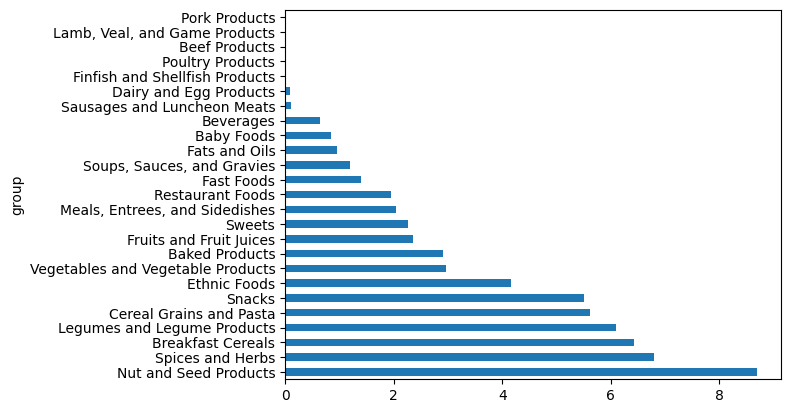

In [263]:
final_df.groupby('group')[fiber].mean().sort_values(ascending=False).plot(kind='barh')